In [31]:
base = "/home/tom/tmp/landscape/"
path_to_landforms_shp = base + "landforms/Landforms_2018_04_26.shp"
#path_to_tifs = base + "tmp/AFO_s27_Landforms_2018_04_26"
path_to_tifs = base + "tmp/AFOlessquarter_s3_Landforms_2018_04_26"
path_to_tifs = base + "tmp/AFOlessquarter_s3_Landforms_2018_04_26"

def path_to(the_tif):
    return os.path.join(path_to_tifs, the_tif)


In [32]:
plt.colorbar?

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0 6


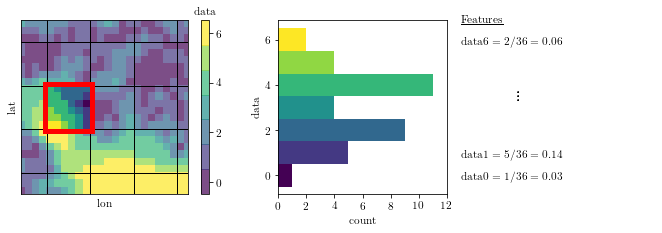

In [67]:
import rasterio  
import os
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pub
import numpy as np
import matplotlib.patches as patches

pub.SetPlotRC_CompGeosci()

#fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(11, 3.2))
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(12, 3.2), gridspec_kw={"width_ratios": (6,4,4)})
src = rasterio.open(path_to("mrvbf.tif"))
band_ID=1                    
band = src.read(band_ID)
band[band > 100] = 0
sizei = 24; sizej=24
i = 380
j = 287
band = band[i:i+sizei, j:j+sizej]

#band[band < 1] = 1
#band[band > 5.9] = 5.9

size = 6
i = 9
j = 4

cropped = np.zeros_like(band)
cropped = np.ma.masked_array(cropped)
cropped.mask = True
cropped.mask[i:i+size, j:j+size] = False
cropped[i:i+size, j:j+size] = band[i:i+size, j:j+size]

cmap = cm.viridis
bounds = np.arange(8)-0.5
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cmap0 = plt.cm.gray
#norm0 = mpl.colors.BoundaryNorm(np.arange(-5, 9), cmap0.N)
print(band.min(), band.max())

pos = ax0.imshow(band, cmap=plt.cm.viridis, norm=norm, alpha = 0.7) # background
#pos = ax0.imshow(band, cmap=plt.cm.viridis, alpha = 1) # background
ax0.set_xlim(0,23)
#ax0.axis('off')
ax0.set_xticks([], [])
ax0.set_yticks([], [])
ax0.set_xlabel(r"$\mathrm{lon}$")
ax0.set_ylabel(r"$\mathrm{lat}$")
#fig.colorbar(pos, ax=ax0)
clb = plt.colorbar(pos, ax=ax0, ticks=(0, 2, 4, 6))
clb.ax.set_title(r"$\mathrm{data}$")


imgp = ax0.imshow(cropped, alpha=1, cmap=cmap, norm=norm) # coloured patch

pmin = -0.5
pmax = 23+0.5
H = np.arange(0, 23, size)+0.5+2
V = np.arange(0, 20, size)+0.5+3
ax0.hlines(H, pmin, pmax, linewidth=1)
ax0.vlines(V, pmin, pmax, linewidth=1)

# rectange
#rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')
#ax.add_patch(rect)
H += 1.
V -= 1
i=0
j=1
d = 0.25
H[i] -= d
H[i+1] += d
V[j] -= d
V[j+1] += d

ax0.plot((H[i], H[i+1], H[i+1], H[i], H[i]), (V[j], V[j], V[j+1], V[j+1], V[j]), 'r-', lw=5, solid_joinstyle="miter")

#cbar = fig.colorbar(imgp, ax=ax0, fraction=0.046)
#cbar.set_ticks(bounds+0.5)
comp = cropped.compressed()


# histogram
N, bins, patches = ax1.hist(comp, bins=np.arange(8)-0.5, orientation='horizontal')
ax1.set_xlabel("$\mathrm{count}$")
ax1.set_ylabel("$\mathrm{data}$")#, labelpad=10)
ax1.set_xticks([0,2,4,6,8,10,12])
# colorize bars
for i, the_patch in enumerate(patches):
    color = cmap(float(i)/(len(patches)-1))
    the_patch.set_facecolor(color)

# normalise feature
for i, n in enumerate(N):
    text = r"$\mathrm{data%i = %2i / %2i = %4.2f}$" % (i, n, N.sum(), n/N.sum())
    if i in [2, 3, 4, 5]: continue
    ax1.text(13, i-0.2, text)
    ax1.text(17, 3.3, r"\LARGE{$\vdots$}")

ax1.text(13, 6.7, r"$\mathrm{\underline{Features}}$")

#ax0.text(-3.5, 1, r"$\mathrm{(a)}$")
#ax0.text(25., 1, r"$\mathrm{(b)}$")
#ax0.text(-3.5, 1, r"(\textbf{a})")
#ax0.text(25., 1, r"(\textbf{b})")

ax2.axis('off')    
#plt.savefig("spatial_aggregation.png", dpi=600)
#plt.tight_layout()
plt.savefig("spatial_aggregation.eps")

    

In [41]:
H

array([ 2.5,  8.5, 14.5, 20.5])